In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent
import DQN.models as models
import maze_generator.maze_dataset as md
import maze_dataset



In [11]:
dataset = md.Maze_dataset(1,(3,3),'percolation')
maze = dataset[0]

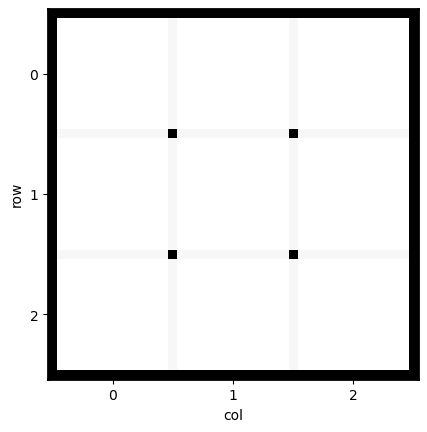

In [12]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [13]:
mult_agent = agent.maze_agents(models.basic_NN,vision=3,action_type='cardinal')
mult_agent.run_agent(maze,len_game=50,num_agents=4,epsilon=1,sample_prob=False)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


cumulative reward: [709.8    688.89   702.3     38.9716]


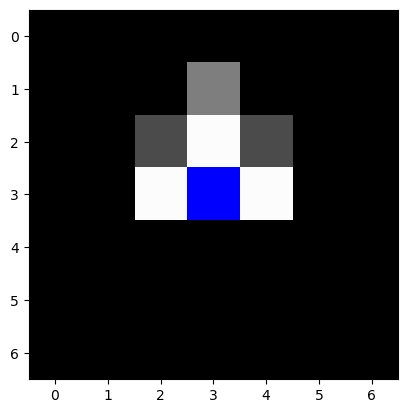

In [14]:
mult_agent.animate_last_replay(0,name='test18')

In [6]:
load = agent.maze_agents.load('second_ball_all_random')
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')
load.run_agent(testing_dataset[0],len_game=15,n_episodes=20,agents_pos = None, targets_pos =None)

cumulative reward: [40.59]
cumulative reward: [40.59]
cumulative reward: [42.48]
cumulative reward: [-12.7985]
cumulative reward: [-11.55]
cumulative reward: [37.95]
cumulative reward: [-6.4393]
cumulative reward: [42.48]
cumulative reward: [-14.5485]
cumulative reward: [39.84]
cumulative reward: [40.59]
cumulative reward: [40.59]
cumulative reward: [-12.5286]
cumulative reward: [-14.4]
cumulative reward: [38.7]
cumulative reward: [37.95]
cumulative reward: [40.59]
cumulative reward: [-6.4393]
cumulative reward: [-12.7985]
cumulative reward: [-11.55]


In [7]:
load.test_agent(testing_dataset,n_episodes=1000,len_game=15,
                num_agents=1)

0.671